In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from trends_analysis.analysis_trends_package.trend_analysis import TrendAnalyzer

Получаем данные поисковых трендов

In [4]:
keywords = ['NFT']
data = TrendAnalyzer.get_trends_data(keywords=keywords, timeframe='today 5-y')
data

Function get_trends_data completed.


D:\PyCharmProjects\6402staryginva\data_analysis\.venv\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,NFT
date,
2019-11-10,0
2019-11-17,0
2019-11-24,0
2019-12-01,0
2019-12-08,0
...,...
2024-10-13,4
2024-10-20,5
2024-10-27,4


Анализ данных по ключевому слову 'NFT'

In [5]:
python_data = data['NFT']
analyzer = TrendAnalyzer(python_data)

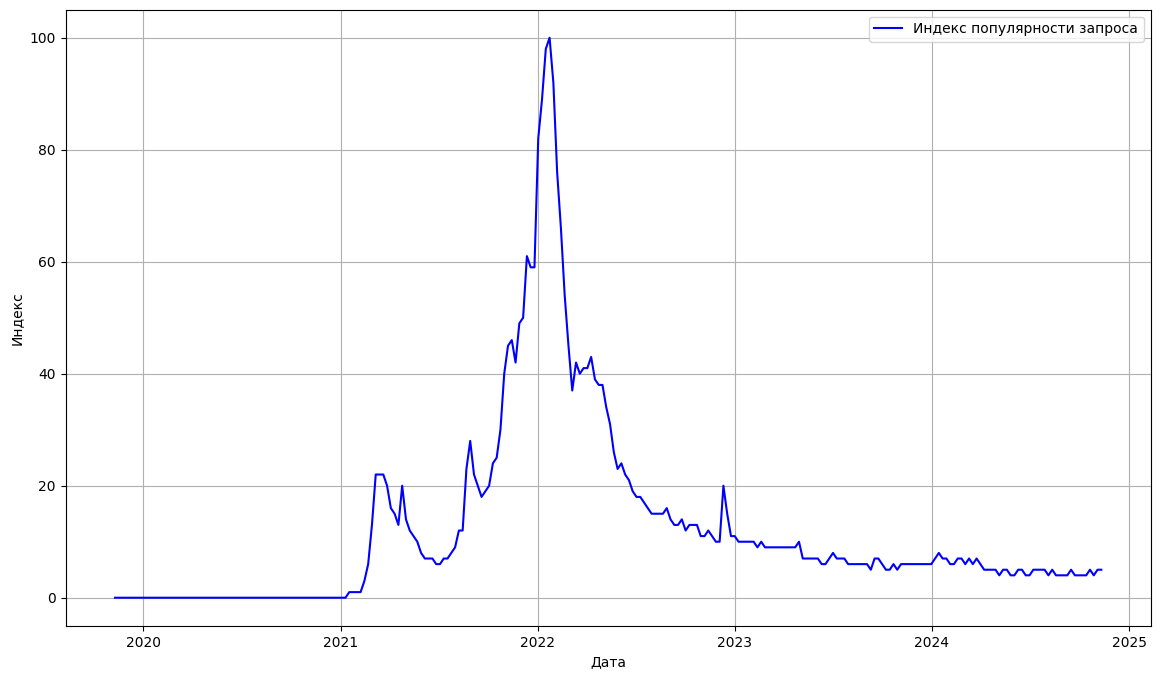

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(python_data.index, python_data, label='Индекс популярности запроса', color='b')
plt.xlabel('Дата')
plt.ylabel('Индекс')
plt.legend(loc='upper right')
plt.grid(True)


Вычисляем скользящее среднее

In [7]:
moving_avg = analyzer.moving_average(window=3)
print("Скользящее среднее:")
moving_avg

Скользящее среднее:


date
2019-11-10         NaN
2019-11-17         NaN
2019-11-24    0.000000
2019-12-01    0.000000
2019-12-08    0.000000
                ...   
2024-10-13    4.000000
2024-10-20    4.333333
2024-10-27    4.333333
2024-11-03    4.666667
2024-11-10    4.666667
Name: Moving Average, Length: 262, dtype: float64

Вычисляем дифференциал

In [8]:
difference = analyzer.difference()
print("Дифференциал:")
difference

Дифференциал:


date
2019-11-10    NaN
2019-11-17    0.0
2019-11-24    0.0
2019-12-01    0.0
2019-12-08    0.0
             ... 
2024-10-13    0.0
2024-10-20    1.0
2024-10-27   -1.0
2024-11-03    1.0
2024-11-10    0.0
Name: Differential, Length: 262, dtype: float64

Вычисляем автокорреляцию

In [9]:
autocorr_value = analyzer.autocorrelation(lag=1)
print(f"Автокорреляция: {autocorr_value}")

Автокорреляция: 0.9840317123949476


Находим локальные максимумы и минимумы

In [10]:
extremum_points = analyzer.find_extremium_points()
extremum_points

,Maximum,Minimum
date,,
2019-11-10,NaN,NaN
2019-11-17,NaN,NaN
2019-11-24,NaN,NaN
2019-12-01,NaN,NaN
2019-12-08,NaN,NaN
...,...,...
2024-10-13,NaN,NaN
2024-10-20,5.0,NaN
2024-10-27,NaN,4.0


Сохраняем результаты анализа в Excel-файл

In [16]:
analyzer.save_to_excel("search_trend_analysis_results.xlsx")
print("Результаты сохранены в search_trend_analysis_results.xlsx")

Function save_to_excel completed.
Результаты сохранены в search_trend_analysis_results.xlsx


In [17]:
result_generator = analyzer.generate_results()

result_dict = {}

for name, series in result_generator:
    result_dict[name] = series

all_results_df = pd.DataFrame(result_dict)

all_results_df

Function generate_results completed.


,Moving Average,Differential,Autocorrelation,Maximum,Minimum
date,,,,,
2019-11-10,NaN,NaN,0.984032,NaN,NaN
2019-11-17,NaN,0.0,0.984032,NaN,NaN
2019-11-24,0.000000,0.0,0.984032,NaN,NaN
2019-12-01,0.000000,0.0,0.984032,NaN,NaN
2019-12-08,0.000000,0.0,0.984032,NaN,NaN
...,...,...,...,...,...
2024-10-13,4.000000,0.0,0.984032,NaN,NaN
2024-10-20,4.333333,1.0,0.984032,5.0,NaN
2024-10-27,4.333333,-1.0,0.984032,NaN,4.0


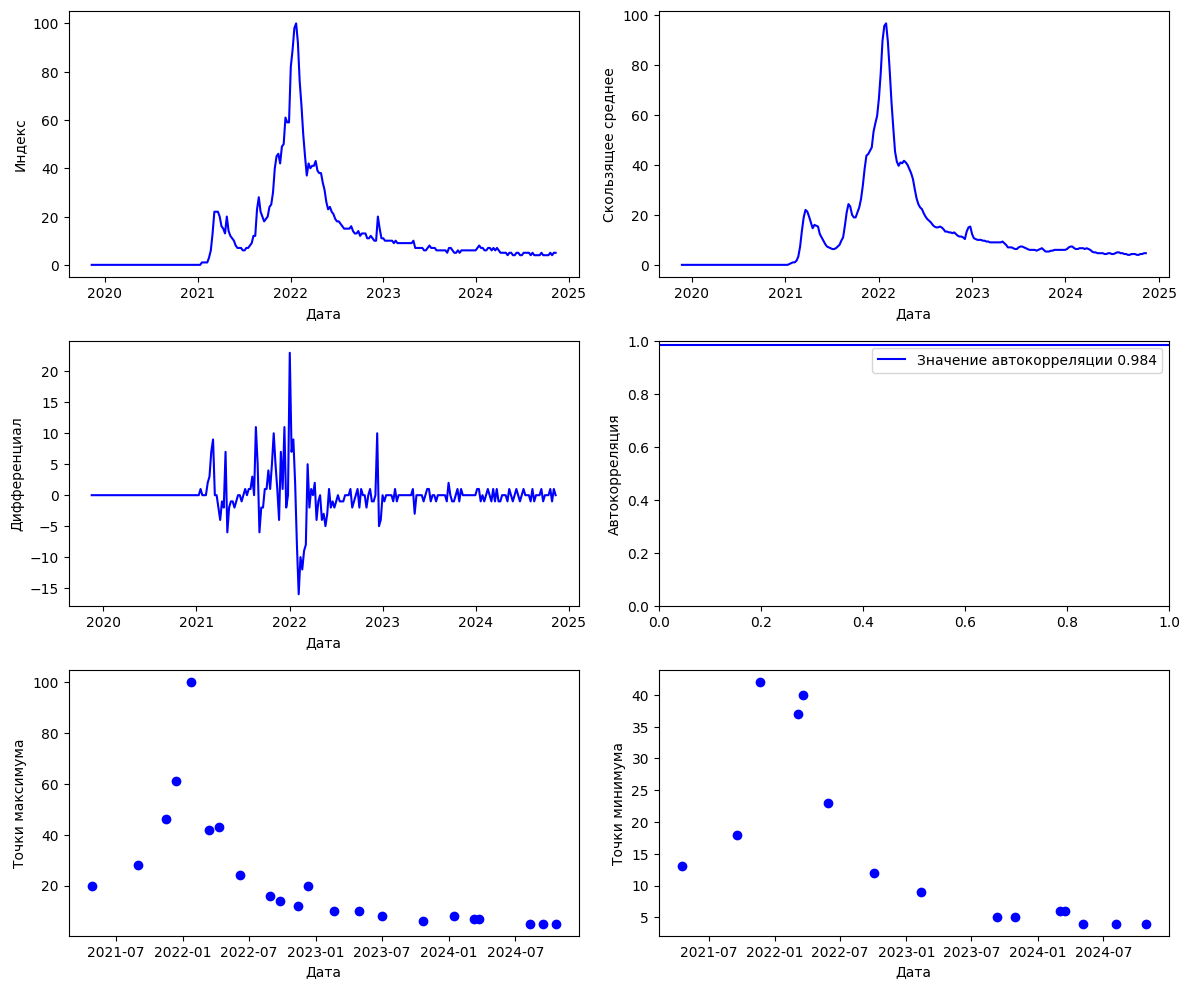

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(python_data.index, python_data, color='b')
plt.xlabel('Дата')
plt.ylabel('Индекс')


plt.subplot(3, 2, 2)
plt.plot(moving_avg.index, moving_avg, color='b')
plt.xlabel('Дата')
plt.ylabel('Скользящее среднее')


plt.subplot(3, 2, 3)
plt.plot(difference.index, difference, color='b')
plt.xlabel('Дата')
plt.ylabel('Дифференциал')


plt.subplot(3, 2, 4)
plt.axhline(y=autocorr_value, label=f'Значение автокорреляции {autocorr_value:.3f}',color='b')
plt.ylabel('Автокорреляция')
plt.legend(loc='upper right')


plt.subplot(3, 2, 5)
plt.plot(extremum_points['Maximum'].index, extremum_points['Maximum'], marker='o', color='b')
plt.xlabel('Дата')
plt.ylabel('Точки максимума')


plt.subplot(3, 2, 6)
plt.plot(extremum_points['Minimum'].index, extremum_points['Minimum'] , marker='o', color='b')
plt.xlabel('Дата')
plt.ylabel('Точки минимума')

plt.tight_layout()
plt.show()